## Problem 1
### 1-1. print title, author, submission date, abstract content, subjects using BeautifulSoup


문제 1-1의 목표는 크롤링을 통해 페이지에 표시되는 문서를 긁어와 출력하는 코드를 작성하는 것입니다. 이를 위해 필요한 모듈은 `bs4` 패지키의 파싱을 위한 `BeautifulSoup` 모듈, 페이지 열람을 위한 `urllib` 패키지의 `urlopen` 모듈로, 코드 작성 첫 시작부분에 import를 통해 불러와 진행하였습니다.

In [113]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

문서 크롤링을 위해 문서가 담긴 페이지의 주소를 `url`변수에 저장한 후, `urlopen.read()` 함수를 통해 내용을 읽어와 `data`라는 변수에 저장하였습니다. 그 후 `BeautifulSoup` 함수를 통해 파싱을 진행하고 이를 `doc`이라는 변수에 저장하였습니다.

In [114]:
url = 'https://arxiv.org/abs/1811.06128'
data = urlopen(url).read()
doc = BeautifulSoup(data, 'html.parser')

페이지 소스보기를 통해 문서의 제목에 해당하는 부분의 html tag가 `h1`, class가 `title mathjax`임을 확인하였습니다. 이를 `doc.find.get_text()`함수를 통해 해당 제목만 추출하여 `title_orig`변수에 저장하였습니다. 페이지에 저장된 값이 제목뿐만이 아니라 "Title: 제목" 형식으로 되어 있어 ':'을 기준으로 한번만 스플릿한 뒤 그 뒤의 값만 가져와 출력하고 싶었기에 제목만 'title'이라는 변수에 저장하고 출력하였습니다.

In [115]:
title_orig = doc.find("h1", attrs={'class': "title mathjax"}).get_text()
title = title_orig.split(':', maxsplit=1)[1]
print("Title: ", title)

Title:  Machine Learning for Combinatorial Optimization: a Methodological Tour d'Horizon


같은 방법으로 저자에 해당하는 tag를 찾아 `find.get_text()` 함수를 통해 저장한 뒤 출력하였습니다. 저자 또한 "Author: 저자" 값으로 저장되어, ':'을 기준으로 한번만 스플릿한 뒤 그 뒤의 값만 가져오도록 하였습니다. `strip()` 함수를 통해 불필요한 공백도 제거하여 출력하였습니다.

In [116]:
author_orig = doc.find("div", attrs={'class': "authors"}).get_text()
author = author_orig.split(':', maxsplit=1)[1]
print("Author: ", author.strip())

Author:  Yoshua Bengio, Andrea Lodi, Antoine Prouvost


제출날짜도 같은 방법으로 불러왔고, 여기서 저장할 값은 날짜에 대한 정보만 있으면 되기 때문에, 불필요한 "Submitted on"이라는 글자를 제거하기 위해, 공백을 기준으로 두번 스플릿하여 맨 뒤의 날짜만 가져와 값을 저장하였습니다. 또한 불필요한 기호 ")"를  `replace()` 함수를 통해 제거하여 출력하였습니다.

In [117]:
date_orig = doc.find("div", attrs={'class': "dateline"}).get_text()
date_mod = date_orig.split(' ', maxsplit=2)[2]
date = date_mod.replace(")", "")
print("Date: ", date)

Date:  15 Nov 2018


초록 내용, 서브젝트도 동일하게 `split()`함수와 `strip()`함수를 통해 불필요한 내용과, 공백을 제거하여 출력하였습니다.

In [118]:
# TODO - print abstract
abstracts = doc.find("blockquote", attrs={'class': "abstract mathjax"}).get_text()
abstract = abstracts.split(': ', maxsplit=1)[1]
print("Abstract: ", abstract.strip())

# TODO - print subjects
subjects = doc.find("td", attrs={'class': "tablecell subjects"}).get_text()
print("Subjects: ", subjects)

Abstract:  This paper surveys the recent attempts, both from the machine learning and
operations research communities, at leveraging machine learning to solve
combinatorial optimization problems. Given the hard nature of these problems,
state-of-the-art methodologies involve algorithmic decisions that either
require too much computing time or are not mathematically well defined. Thus,
machine learning looks like a promising candidate to effectively deal with
those decisions. We advocate for pushing further the integration of machine
learning and combinatorial optimization and detail methodology to do so. A main
point of the paper is seeing generic optimization problems as data points and
inquiring what is the relevant distribution of problems to use for learning on
a given task.
Subjects:  Machine Learning (cs.LG); Machine Learning (stat.ML)


### 1-2. Tokenize abstract content by words and POS-Tag tokenized words

문제 1-2의 목표는 저장된 텍스트 문서를 토큰화 하고, Pos tagging하는 것입니다. 이를 위해 `nltk`패키지의 `word_tokenize()` 함수와 `pos_tag()`함수를 import하여 진행하였습니다.

문제 1-1에서 저장하였던 초록을 `word_tokenize()` 함수를 통해  토큰화하였고, 이를 `tokenized_words` 변수에 저장하여 출력하였습니다. 

In [119]:
from nltk.tokenize import word_tokenize
tokenized_words = word_tokenize(abstract, preserve_line=True)
print("Tokenize Result: ", tokenized_words)

Tokenize Result:  ['This', 'paper', 'surveys', 'the', 'recent', 'attempts', ',', 'both', 'from', 'the', 'machine', 'learning', 'and', 'operations', 'research', 'communities', ',', 'at', 'leveraging', 'machine', 'learning', 'to', 'solve', 'combinatorial', 'optimization', 'problems.', 'Given', 'the', 'hard', 'nature', 'of', 'these', 'problems', ',', 'state-of-the-art', 'methodologies', 'involve', 'algorithmic', 'decisions', 'that', 'either', 'require', 'too', 'much', 'computing', 'time', 'or', 'are', 'not', 'mathematically', 'well', 'defined.', 'Thus', ',', 'machine', 'learning', 'looks', 'like', 'a', 'promising', 'candidate', 'to', 'effectively', 'deal', 'with', 'those', 'decisions.', 'We', 'advocate', 'for', 'pushing', 'further', 'the', 'integration', 'of', 'machine', 'learning', 'and', 'combinatorial', 'optimization', 'and', 'detail', 'methodology', 'to', 'do', 'so.', 'A', 'main', 'point', 'of', 'the', 'paper', 'is', 'seeing', 'generic', 'optimization', 'problems', 'as', 'data', 'poin

토큰화된 단어들을 pos tagging하기 위해 `pos_tag()` 함수를 사용하였고, 이를 `tagged_list` 변수에 저장하여 출력하였습니다.

In [120]:
from nltk.tag import pos_tag
tagged_list = pos_tag(tokenized_words, tagset=None, lang='eng')
print("Pos_tag Result: ", tagged_list)

Pos_tag Result:  [('This', 'DT'), ('paper', 'NN'), ('surveys', 'VBZ'), ('the', 'DT'), ('recent', 'JJ'), ('attempts', 'NNS'), (',', ','), ('both', 'DT'), ('from', 'IN'), ('the', 'DT'), ('machine', 'NN'), ('learning', 'NN'), ('and', 'CC'), ('operations', 'NNS'), ('research', 'NN'), ('communities', 'NNS'), (',', ','), ('at', 'IN'), ('leveraging', 'VBG'), ('machine', 'NN'), ('learning', 'VBG'), ('to', 'TO'), ('solve', 'VB'), ('combinatorial', 'JJ'), ('optimization', 'NN'), ('problems.', 'NN'), ('Given', 'NNP'), ('the', 'DT'), ('hard', 'JJ'), ('nature', 'NN'), ('of', 'IN'), ('these', 'DT'), ('problems', 'NNS'), (',', ','), ('state-of-the-art', 'JJ'), ('methodologies', 'NNS'), ('involve', 'VBP'), ('algorithmic', 'JJ'), ('decisions', 'NNS'), ('that', 'IN'), ('either', 'DT'), ('require', 'VB'), ('too', 'RB'), ('much', 'JJ'), ('computing', 'VBG'), ('time', 'NN'), ('or', 'CC'), ('are', 'VBP'), ('not', 'RB'), ('mathematically', 'RB'), ('well', 'RB'), ('defined.', 'JJ'), ('Thus', 'NNP'), (',', ','

### 1-3. sort tokenized words by frequency

문제 1-3의 목표는 토큰화된 단어들을 출현 빈도가 높은 순으로 정렬하는 것입니다.

각 단어들의 출현 빈도는 `numpy`모듈을 `unique` 함수를 이용해서 계산하였습니다. 리턴되는 값은 유니크한 값(단어)의 리스트와 각각의 카운트인데, 이것을 `zip` 함수를 이용해서 `dict`로 변형시켰습니다.

In [121]:
import numpy as np
unique_word_list, word_count_list = np.unique(tokenized_words, return_counts=True)
token_count = dict(zip(unique_word_list, word_count_list))

token_sorted = sorted([(n,m) for n,m in token_count.items()], key=lambda x: -x[1])
print("Sorting Token by frequency: ", token_sorted)

Sorting Token by frequency:  [('the', 6), ('learning', 5), ('and', 4), ('to', 4), ('of', 4), ('machine', 4), (',', 4), ('problems', 3), ('optimization', 3), ('a', 2), ('combinatorial', 2), ('paper', 2), ('for', 2), ('is', 2), ('that', 1), ('on', 1), ('communities', 1), ('methodology', 1), ('decisions', 1), ('require', 1), ('relevant', 1), ('so.', 1), ('detail', 1), ('too', 1), ('promising', 1), ('We', 1), ('Given', 1), ('use', 1), ('task', 1), ('defined.', 1), ('generic', 1), ('with', 1), ('.', 1), ('algorithmic', 1), ('hard', 1), ('deal', 1), ('state-of-the-art', 1), ('nature', 1), ('advocate', 1), ('further', 1), ('what', 1), ('leveraging', 1), ('recent', 1), ('attempts', 1), ('decisions.', 1), ('these', 1), ('involve', 1), ('well', 1), ('data', 1), ('methodologies', 1), ('A', 1), ('or', 1), ('at', 1), ('mathematically', 1), ('are', 1), ('do', 1), ('inquiring', 1), ('those', 1), ('Thus', 1), ('seeing', 1), ('surveys', 1), ('time', 1), ('distribution', 1), ('as', 1), ('operations', 1)

### 1-4. plot WordCloud and apply stopwords to WordCloud


문제 1-4의 목표는 1-3의 토큰화되고 정렬된 단어들을 이용하여 word cloud를 만들고, 만들어진 word cloud보다 abstract의 내용을 더 잘 표현하는 word cloud를 생성하는 것입니다.

1-3의 token_count dictionary를 이용하여 word cloud를 만들었을 때, 결과는 다음과 같습니다.

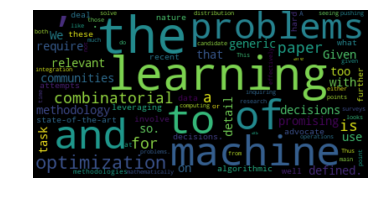

In [122]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# using 'token_count' dictionary to plot wordcloud
wordcloud = WordCloud().generate_from_frequencies(token_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

위의 word cloud는 'to, of, and' 등의 stop words들이 다수 포함되어 있고 '(apostrophe)와 .(period)등의 특수글자들이 등장하고 있습니다.

In [136]:
new_tokenized_words = word_tokenize(abstract, preserve_line=False)
new_tagged_list = pos_tag(tokenized_words, tagset=None, lang='eng')
new_tokens_without_punctutation = list(filter(lambda x: x[0] not in [',', '.'], new_tagged_list))
new_words = list(map(lambda x: x[0].lower(), new_tokens_without_punctutation))
print(new_words)

['this', 'paper', 'surveys', 'the', 'recent', 'attempts', 'both', 'from', 'the', 'machine', 'learning', 'and', 'operations', 'research', 'communities', 'at', 'leveraging', 'machine', 'learning', 'to', 'solve', 'combinatorial', 'optimization', 'problems', 'given', 'the', 'hard', 'nature', 'of', 'these', 'problems', 'state-of-the-art', 'methodologies', 'involve', 'algorithmic', 'decisions', 'that', 'either', 'require', 'too', 'much', 'computing', 'time', 'or', 'are', 'not', 'mathematically', 'well', 'defined', 'thus', 'machine', 'learning', 'looks', 'like', 'a', 'promising', 'candidate', 'to', 'effectively', 'deal', 'with', 'those', 'decisions', 'we', 'advocate', 'for', 'pushing', 'further', 'the', 'integration', 'of', 'machine', 'learning', 'and', 'combinatorial', 'optimization', 'and', 'detail', 'methodology', 'to', 'do', 'so', 'a', 'main', 'point', 'of', 'the', 'paper', 'is', 'seeing', 'generic', 'optimization', 'problems', 'as', 'data', 'points', 'and', 'inquiring', 'what', 'is', 'th

Punctuation을 제거하기 위해서 `word_tokenize` 함수의 `preseve_line` 옵션을 `False`로 설정하고, `word_tokenize`와 `pos_tag`도 다시 했습니다. 그 후, `lower` 함수를 이용하여 대문자를 소문자로 변환한 후 토큰화했습니다.

In [137]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
words_except_stopword = list(filter(lambda x: x not in stopwords, new_words))
print(words_except_stopword)

['paper', 'surveys', 'recent', 'attempts', 'machine', 'learning', 'operations', 'research', 'communities', 'leveraging', 'machine', 'learning', 'solve', 'combinatorial', 'optimization', 'problems', 'given', 'hard', 'nature', 'problems', 'state-of-the-art', 'methodologies', 'involve', 'algorithmic', 'decisions', 'either', 'require', 'much', 'computing', 'time', 'mathematically', 'well', 'defined', 'thus', 'machine', 'learning', 'looks', 'like', 'promising', 'candidate', 'effectively', 'deal', 'decisions', 'advocate', 'pushing', 'integration', 'machine', 'learning', 'combinatorial', 'optimization', 'detail', 'methodology', 'main', 'point', 'paper', 'seeing', 'generic', 'optimization', 'problems', 'data', 'points', 'inquiring', 'relevant', 'distribution', 'problems', 'use', 'learning', 'given', 'task']


표준 Stopwords 목록에 포함된 단어는 `filter`함수를 이용해서 제외했습니다.

In [140]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words = list(map(lambda x: lemmatizer.lemmatize(x), words_except_stopword))
print(lemmatized_words)

new_word_list, new_word_count_list = np.unique(lemmatized_words, return_counts=True)
new_word_count_dict = dict(zip(new_word_list, new_word_count_list))
print(new_word_count_dict)

['paper', 'survey', 'recent', 'attempt', 'machine', 'learning', 'operation', 'research', 'community', 'leveraging', 'machine', 'learning', 'solve', 'combinatorial', 'optimization', 'problem', 'given', 'hard', 'nature', 'problem', 'state-of-the-art', 'methodology', 'involve', 'algorithmic', 'decision', 'either', 'require', 'much', 'computing', 'time', 'mathematically', 'well', 'defined', 'thus', 'machine', 'learning', 'look', 'like', 'promising', 'candidate', 'effectively', 'deal', 'decision', 'advocate', 'pushing', 'integration', 'machine', 'learning', 'combinatorial', 'optimization', 'detail', 'methodology', 'main', 'point', 'paper', 'seeing', 'generic', 'optimization', 'problem', 'data', 'point', 'inquiring', 'relevant', 'distribution', 'problem', 'use', 'learning', 'given', 'task']
{'operation': 1, 'given': 2, 'methodology': 2, 'require': 1, 'detail': 1, 'combinatorial': 2, 'promising': 1, 'candidate': 1, 'use': 1, 'defined': 1, 'hard': 1, 'generic': 1, 'algorithmic': 1, 'relevant':

stopwords가 아닌 단어들을 대상으로 lemmatizing하여 `lemmatized_words`라는 list에 저장했습니다.

Porter Stemmer등의 Stemmer을 이용하지 않은 이유는, 단어가 아닌 stem(어간)을 출력하여 사전에 없는 결과가 나올수 있기 때문입니다. Lemmatizing은 Stemming보다 더 많은 정보(문맥, 형태소, 사전적 분석)를 고려하여 더 높은 단어정확도를 보입니다.

위에서 모든 처리를 마친 `new_word_count_dict`를 이용하여 새로운 word cloud인 `new_worldcloud`를 생성한 결과는 다음과 같습니다.

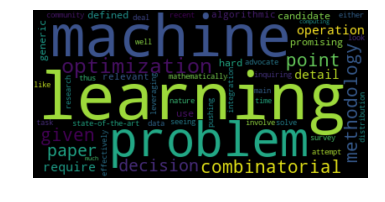

In [142]:
new_wordcloud = WordCloud().generate_from_frequencies(new_word_count_dict)
plt.imshow(new_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()